# learn about simulation

In [1]:
import sys
import os

# Add the current working directory to sys.path
sys.path.append(os.path.abspath('..'))

# Print sys.path to verify the change
print(sys.path)

['/home/lpr/project_nattabude/carla/self-driving-sb3/notebook', '/home/lpr', '/home/lpr/miniconda3/envs/TRT86/lib/python38.zip', '/home/lpr/miniconda3/envs/TRT86/lib/python3.8', '/home/lpr/miniconda3/envs/TRT86/lib/python3.8/lib-dynload', '', '/home/lpr/miniconda3/envs/TRT86/lib/python3.8/site-packages', '/home/lpr/project_nattabude/carla/self-driving-sb3']


In [7]:
import matplotlib.pyplot as plt

In [2]:
import carla

client = carla.Client('localhost', 2000)
client.set_timeout(120)
world = client.get_world()  


In [ ]:
settings = world.get_settings()
settings.fixed_delta_seconds = 0.2
settings.synchronous_mode = True
settings.max_substeps = 16
settings.max_substep_delta_time = 0.0125
world.apply_settings(settings)
client.reload_world(False)

In [4]:
from environment.tools.actor_wrapper import *

In [5]:
from utils.tools import carla_point
from config.spawn_points import car_spawn
car_spawnponts = [carla_point(p) for p in car_spawn]

In [6]:
blueprints = world.get_blueprint_library()
bp_car = blueprints.filter('evt_echo_4s')[0]   
car = world.spawn_actor(bp_car, car_spawnponts[0])

In [8]:
from config.camera import front_cam,spectator_cam

cam1 = RGBCamera(world,car,front_cam)

In [9]:
image=cam1.get_image()

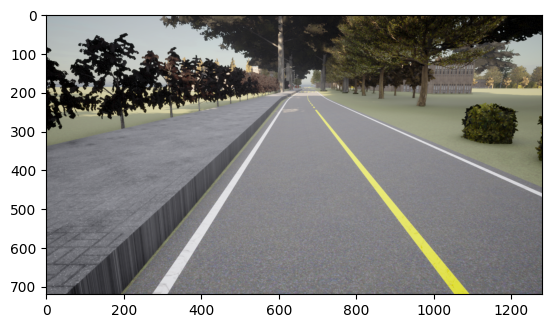

In [11]:
plt.imshow(image)

In [13]:
cam1.destroy()

Destroying  <environment.tools.env_wrapper.RGBCamera object at 0x73e54c123b50> ...


In [16]:
car.destroy()

True

In [17]:
actors1 = world.get_actors()
for actor in actors1:
    print(actor)

len(actors1)

Actor(id=129, type=traffic.speed_limit.30)
Actor(id=128, type=traffic.speed_limit.30)
Actor(id=127, type=traffic.speed_limit.30)
Actor(id=126, type=traffic.speed_limit.30)
Actor(id=125, type=traffic.speed_limit.30)
Actor(id=124, type=traffic.speed_limit.30)
Actor(id=123, type=traffic.speed_limit.30)
Actor(id=122, type=traffic.speed_limit.30)
Actor(id=121, type=traffic.speed_limit.30)
Actor(id=120, type=traffic.speed_limit.30)
Actor(id=119, type=traffic.speed_limit.30)
Actor(id=118, type=traffic.speed_limit.30)
Actor(id=117, type=traffic.speed_limit.30)
Actor(id=116, type=traffic.speed_limit.30)
Actor(id=115, type=traffic.speed_limit.30)
Actor(id=114, type=traffic.speed_limit.30)
Actor(id=113, type=traffic.speed_limit.30)
Actor(id=112, type=traffic.speed_limit.30)
Actor(id=111, type=traffic.speed_limit.30)
Actor(id=110, type=traffic.speed_limit.30)
Actor(id=109, type=traffic.speed_limit.30)
Actor(id=108, type=traffic.speed_limit.30)
Actor(id=107, type=traffic.speed_limit.30)
Actor(id=10

43

In [ ]:
map = world.get_map()

In [ ]:
spawn_points = map.get_spawn_points()

In [ ]:
print(spawn_points[0])

In [2]:
from environment.Env import CarlaImageEnv
from config.spawn_points import car_spawn
from environment.tools.rewarder import reward_dummy
from environment.tools.observer import dummy_observer
from config.camera import front_cam,left_cam,right_cam,front_cam_seg,left_cam_seg,right_cam_seg

cam_configs =[front_cam,left_cam,right_cam]
camseg_configs =[front_cam_seg,left_cam_seg,right_cam_seg]

reward_fn = reward_dummy()
observer = dummy_observer()

env = CarlaImageEnv(car_spawn=car_spawn,
                    observer=observer,
                    cam_config_list=camseg_configs,
                    activate_render=True,
                    reward_fn=reward_fn)

using  NVIDIA GeForce RTX 4060
using continuous space steer = [-1,1] , throttle = [0,1]


/home/lpr/miniconda3/envs/TRT86/lib/python3.8/site-packages/gym/spaces/box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


In [ ]:
actors = env.world.get_actors()

In [ ]:
for actor in actors:
    print(actor)

In [ ]:
env.action_space.sample()

In [4]:
import time

observation = env.reset()
done = False


act = [0.0012,0.6]
while True:
    observation, reward, done, _ = env.step(act)
    if done :
        break


In [ ]:
import matplotlib.pyplot as plt
plt.imshow(observation[2])

In [5]:
env.close()

sensor already destroy


In [ ]:
env.observation_space.sample()

In [ ]:
act

In [ ]:
observation, reward, done, _ = env.step(act)

In [ ]:

a = lambda x,y=1:print(x,y) 

In [ ]:
a(7)

In [ ]:
[1,23,43,4][:-1]

In [ ]:
import numpy as np


In [ ]:
np.finfo(np.float32).min

In [ ]:
np.finfo(np.float32).max

In [ ]:
from collections import deque
f=1
s=0
histo = deque(maxlen=f*(s+1)-s)
init_item = [np.array([1,i],np.float32) for i in range(f*(s+1)+1)]
histo.extend(init_item)
sampling = [histo[i] for i in range(len(histo)) if i%(s+1)==0]
histo,sampling

In [ ]:
histo.append(np.array([1,43]))
sampling = [histo[i] for i in range(len(histo)) if i%(s+1)==0]
histo,sampling

In [ ]:
np.concatenate(sampling)

In [ ]:
def tes(**arg):
    print(arg)

In [ ]:
tes(img =1, act = 3)

In [ ]:
from gym import spaces

observation_space = spaces.Box(low=np.finfo(np.float32).min,
                                                high=np.finfo(np.float32).max,
                                                shape=(1, 7),
                                                dtype=np.float32)

In [ ]:
1 or 2

In [ ]:
observation_space.shape[1]

In [ ]:
action_space = spaces.Discrete(4)

In [ ]:
action_space

In [ ]:
action_space.n

In [ ]:
assert False
print(1)

In [ ]:
np.repeat(observation_space.high, 3, axis=-1)

In [ ]:
obs = spaces.Box(low=0, high=255,shape=(10,12,3), dtype=np.uint8)

In [ ]:
obs.sample().shape

In [ ]:
from pygame.locals import K_TAB

In [ ]:
import numpy as np
from collections import deque
from gym import spaces

In [ ]:
observation_space = spaces.Dict({
            'seg': spaces.Box(low=0, high=3, shape=(16,16,4), dtype=np.uint8)
        })

In [ ]:
action_space = spaces.Box(np.array([-1, 0]), np.array([1, 1]), dtype=np.float32) 

In [ ]:
observation_space.spaces['action'] = action_space

In [ ]:
stacked_action_space = spaces.Tuple((action_space,) * 4)

In [ ]:
stacked_action_space

In [ ]:
import pygame
import cv2
import os


In [ ]:
def set_world(world):
    settings = world.get_settings()
    settings.synchronous_mode = True
    settings.fixed_delta_seconds = 0.2
    settings.max_substeps = 16
    settings.max_substep_delta_time = 0.0125
    world.apply_settings(settings)

In [ ]:
def setting_camera(cam_type,cam_config):
        
    bp_cam = blueprints.find(cam_type)
    bp_cam.set_attribute('image_size_y', str(cam_config['image_size_y']))
    bp_cam.set_attribute('image_size_x', str(cam_config['image_size_x']))
    bp_cam.set_attribute('fov', str(cam_config['fov']))
    bp_cam.set_attribute('sensor_tick', str(cam_config['sensor_tick']))

    return bp_cam

In [ ]:
from config.spawn_points import car_spawn
from utils.tools import carla_point
from config.camera import front_cam,left_cam,right_cam

import carla
carSPs = [carla_point(p) for p in car_spawn]

camera_list = [front_cam,left_cam,right_cam]
camera_dict = {s['name']:s for s in camera_list}

# Connect to the CARLA server
client = carla.Client('localhost', 2000)
client.set_timeout(2.0)

# Get the version information
version = client.get_client_version()
print("CARLA Version:", version)

world = client.get_world()

set_world(world)

# Destroy all actors
actors = world.get_actors()
for actor in actors:
    actor.destroy()

blueprints = world.get_blueprint_library()

bp_car = blueprints.filter("evt_echo_4s")[0]

car = world.spawn_actor(bp_car, carSPs[0])

cams = []

for s in camera_list:
    bp_cam = setting_camera('sensor.camera.semantic_segmentation',s)
    cam = world.spawn_actor(bp_cam, carla.Transform(carla.Location(*s['Location']), carla.Rotation(*s['Rotation'])), attach_to=car)
    dir = os.path.join("save",s['name'])
    os.makedirs(dir,exist_ok=True)
    cam.listen(lambda image,dir = dir: image.save_to_disk(os.path.join(dir,str(len(os.listdir(dir))+1)+".jpg")))
    cams.append(cam)

pygame.init()
pygame.font.init()
display = pygame.display.set_mode((1120, 560), pygame.HWSURFACE | pygame.DOUBLEBUF)
clock = pygame.time.Clock()

In [ ]:
def process_image(image):
    img = pygame.image.frombuffer(image.raw_data, (image.width, image.height), 'RGB')
    display.blit(img, (0, 0))

In [ ]:
import keyboard

In [ ]:
import pygame
import time
# Initialize Pygame
pygame.init()

# Set up the display
pygame.display.set_caption("test carla")
clock = pygame.time.Clock()

# Load an image
image = pygame.image.load("save/test1.jpg")

# Main loop
running = True
st=time.time()
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

    # Clear the screen
    display.fill((255, 255, 255))
    
    # Draw the image onto the screen
    display.blit(image, (100, 100))  # Drawing the image at (100, 100) on the screen

    # Update the display
    pygame.display.flip()

    clock.tick()
    world.tick()

# Quit Pygame
pygame.quit()


In [ ]:
# Example file showing a basic pygame "game loop"
import pygame

# pygame setup
pygame.init()
screen = pygame.display.set_mode((1280, 720))
clock = pygame.time.Clock()
running = True

while running:
    # poll for events
    # pygame.QUIT event means the user clicked X to close your window
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

    # fill the screen with a color to wipe away anything from last frame
    screen.fill("purple")

    # RENDER YOUR GAME HERE

    # flip() the display to put your work on screen
    pygame.display.flip()

    clock.tick(60)  # limits FPS to 60

pygame.quit()

In [ ]:

pygame.event.pump()
if pygame.key.get_pressed()[K_ESCAPE]:
    pygame.close()

clock.tick()


In [ ]:
while True:
    world.tick()

In [ ]:
# save image
name = "test1"
cams[int(name[-1])].listen(lambda image,name=name: image.save_to_disk(f'save/{name}.jpg'))

In [ ]:
cams[int(name[-1])].stop()

In [ ]:
# Destroy actors
cams[int(name[-1])].destroy()


In [ ]:
control = carla.VehicleAckermannControl(steer=0, steer_speed=0.0 ,speed=0.0, acceleration=0, jerk=0.0)
car.apply_ackermann_control(control)

In [ ]:
control = carla.VehicleControl(throttle=0, steer=-1, brake=0,
                                hand_brake=False, reverse=False, manual_gear_shift=False, gear=0)
car.apply_control(control)

In [ ]:
car.destroy()

In [ ]:
world.tick()

In [ ]:
import carla
from config.spawn_points import car_spawn
from utils.tools import carla_point




In [ ]:
from gym import spaces
import numpy as np

In [ ]:
action_space = spaces.Box(np.array([-1, 0]), np.array([1, 1]), dtype=np.float32)

In [ ]:
a,b = action_space.sample()
a,b

In [ ]:


observation_space = spaces.Dict({
            'seg': spaces.Box(low=0, high=255, shape=(10,15,10 ,20), dtype=np.uint8),
            'action': spaces.Box(low=-1.0, high=1.0, shape=(8,), dtype=np.float32),
        })


In [ ]:
observation_space.sample()['seg'].shape

In [ ]:
random_image = np.random.randint(0, 256, size=(10, 20, 3), dtype=np.uint8)

In [ ]:
list_img = [random_image]*5

In [ ]:
a= np.array(list_img, dtype=np.uint8)
a.shape

In [ ]:
state_seg_tmp = np.concatenate((a, a), axis=0)

In [ ]:
state_seg_tmp.shape

In [ ]:
from config.camera import front_cam,right_cam,left_cam

camera_list = [front_cam,right_cam,left_cam]
camera_list

In [ ]:
{cam['name']:spaces.Box(low=0, high=255, shape=(8,SEG_SIZE,), dtype=np.uint8) for cam in camera_list}

In [ ]:
observation_space = spaces.Dict({
            'seg': spaces.Box(low=0, high=255, shape=(IN_CHANNLES,SEG_SIZE,), dtype=np.uint8),
            'action': spaces.Box(low=-1.0, high=1.0, shape=(N_LOOK_BACK,), dtype=np.float32),

        })

In [ ]:
a =spaces.Box(np.array([-1, 0]), np.array([1, 1]))

In [ ]:
a.dtype

In [ ]:
action_space = spaces.Box(np.array([-1, 0]), np.array([1, 1]), dtype=np.float32)

In [ ]:
action_space.sample()